In [1]:
#step1 !pip install all the necesary libraries

In [2]:
import numpy as np
import pandas as pd

In [3]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [5]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [6]:
# load the data 

In [29]:
df = pd.read_csv("Demo Datasets/USAHousing.csv")

In [30]:
print(df.columns)

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')


In [31]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [33]:
#df.drop("Address", axis =1, inplace = True)

In [11]:
# select the label

In [34]:
label = "Price"

In [35]:
Features = df.loc[:, df.columns != label]
labels =  df.loc[:, label]

In [36]:
# split into train and test

In [37]:

X_train, X_test, y_train, y_test = train_test_split(Features,
                                                    labels,
                                                    test_size=0.2,
                                                   random_state = 5)

In [38]:
# check wheather labels are categorical or numerical by code and get apporal to change if required

In [39]:
def regressor():
    models = []
    metrix = []
    train_accuracy = []
    test_accuracy = []
    models.append(('LinearRegression', LinearRegression()))
    models.append(('DecisionTreeRegressor', DecisionTreeRegressor()))
    models.append(('RandomForestRegressor', RandomForestRegressor()))
    models.append(('BaggingRegressor', BaggingRegressor()))
    models.append(('GradientBoostingRegressor', GradientBoostingRegressor()))
    models.append(('AdaBoostRegressor', AdaBoostRegressor()))
    models.append(('SVR', SVR()))
    models.append(('KNeighborsRegressor', KNeighborsRegressor()))
    for name, model in models:
            m = model
            m.fit(X_train, y_train)
            y_pred = m.predict(X_test)
            r_square = r2_score(y_test,y_pred)
            rmse = np.sqrt(mean_squared_error(y_test,y_pred))
            #print(name," ( r_square , rmse) is: ", r_square, rmse)
            metrix.append((name, r_square, rmse))
    return metrix


In [40]:
def classifier():
    models = []
    metrix = []
    train_accuracy = []
    test_accuracy = []
    models.append(('LogisticRegression', LogisticRegression(solver='liblinear', multi_class='ovr')))
    models.append(('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()))
    models.append(('KNeighborsClassifier', KNeighborsClassifier()))
    models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
    models.append(('GaussianNB', GaussianNB()))
    models.append(('RandomForestClassifier', RandomForestClassifier(n_estimators=100)))
    models.append(('SVM', SVC(gamma='auto')))
    models.append(('Linear_SVM', LinearSVC()))
    models.append(('XGB', XGBClassifier()))
    models.append(('SGD', SGDClassifier()))
    models.append(('Perceptron', Perceptron()))
    for name, model in models:
            m = model
            m.fit(X_train, y_train)
            y_pred = m.predict(X_test)
            train_acc = round(m.score(X_train, y_train) * 100, 2)
            test_acc = metrics.accuracy_score(y_test,y_pred) *100
            c_report = classification_report(y_test, y_pred)
            #print(name," (train accuracy , test_accuracy) is: ", train_acc, test_acc)
            metrix.append([name, train_acc, test_acc, c_report])
    return metrix

In [41]:
len(labels.unique())

5000

In [42]:
if(len(labels.unique())<10):
    metrix = classifier()
    #print(metrix)
    #print(" for model ", metrix[0], "r_square is:", metrix[1], "rmse is:", metrix[2] )
else:
    metrix = regressor()
    print(metrix)
    #print(" for model ", metrix[0], "r_square is:", metrix[1], "rmse is:", metrix[2] )
#print("if you want to change select below option")

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.


[('LinearRegression', 0.9031967342796202, 104494.1042759712), ('DecisionTreeRegressor', 0.7163728692722969, 178863.06515245512), ('RandomForestRegressor', 0.8536078483075611, 128500.75526548488), ('BaggingRegressor', 0.8484323167512008, 130752.52648840359), ('GradientBoostingRegressor', 0.8881388046627074, 112327.60809011097), ('AdaBoostRegressor', 0.8149191585747613, 144486.58145073592), ('SVR', -2.4698733245287485e-06, 335851.5210236746), ('KNeighborsRegressor', 0.4793746458857443, 242331.2598982563)]


In [21]:

import lime
import lime.lime_tabular

Global interpretability — the SHAP values can show how much each predictor contributes, either positively or negatively, to the target variable. This is like the variable importance plot but it is able to show the positive or negative relationship for each variable with the target (see the summary plots below).
#

Local interpretability — each observation gets its own set of SHAP values (see the individual force plots below). This greatly increases its transparency. We can explain why a case receives its prediction and the contributions of the predictors. Traditional variable importance algorithms only show the results across the entire population but not on each individual case. The local interpretability enables us to pinpoint and contrast the impacts of the factors.


In [43]:
# Build the model with the random forest regression algorithm:
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


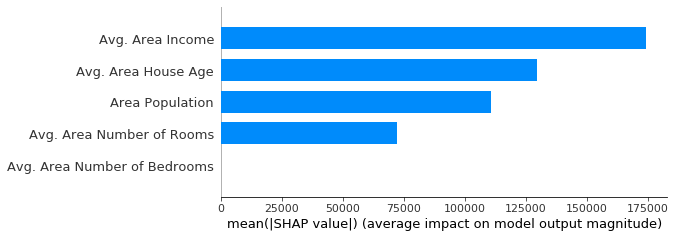

In [44]:
import shap
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [73]:
#shap_values are values that are formed how the model col values bias towards output

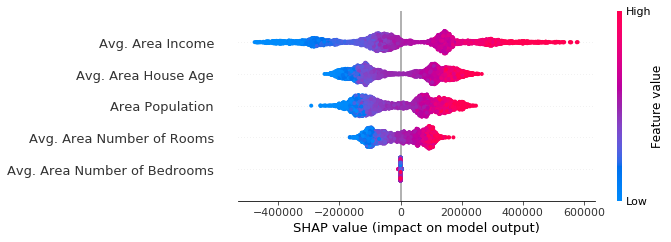

In [47]:

shap.summary_plot(shap_values, X_train)

Feature importance: Variables are ranked in descending order.

Impact: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.

Original value: Color shows whether that variable is high (in red) or low (in blue) for that observation.

Correlation: A high level of the “alcohol” content has a high and positive impact on the quality rating. The “high” comes from the red color, and the “positive” impact is shown on the X-axis. Similarly, we will say the “volatile acidity” is negatively correlated with the target variable.

In [52]:
#shap.dependence_plot(df["Area Population"], shap_values, X_train)

##  Individual SHAP Value Plot — Local Interpretability

In [57]:
# Get the predictions and put them with the test data.
X_output = X_test.copy()
X_output.loc[:,'predict'] = np.round(model.predict(X_output),2)

# Randomly pick some observations
random_picks = np.arange(1,330,50) # Every 50 rows
S = X_output.iloc[random_picks]
S

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,predict
1482,77528.123000,6.860068,7.739400,4.26,23976.713854,1419201.06
4401,53510.244346,6.033123,5.615798,2.45,22977.915385,817620.46
2824,74881.598535,4.125901,8.457887,5.11,60895.408165,1549853.33
866,75151.105555,7.299215,6.596280,3.30,32032.141095,1468038.16
2588,95000.786375,5.370193,8.030299,5.45,44202.656140,1797851.50
2030,67907.058765,5.426837,5.645459,2.26,30268.359118,923296.07
1712,87332.293234,5.845099,6.720340,3.30,43754.452937,1706948.73


In [58]:
# Initialize your Jupyter notebook with initjs(), otherwise you will get an error message.
shap.initjs()

# Write in a function
def shap_plot(j):
    explainerModel = shap.TreeExplainer(model)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)

In [59]:
shap_plot(0)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [60]:
shap_plot(1)

In [62]:
shap_plot(2)

In [63]:
shap_plot(3)

In [64]:
shap_plot(4)

In [65]:
shap_plot(5)

In [66]:
shap_plot(6)

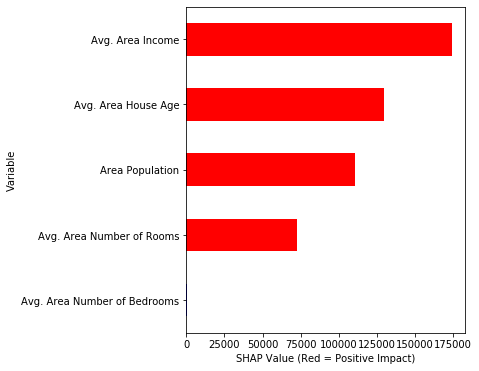

In [68]:

def ABS_SHAP(df_shap,df):
    #df is features
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(5,6),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")
    
ABS_SHAP(shap_values,X_train) 

In [71]:
shap_values

array([[-4.60913255e+04,  1.17427861e+05, -2.59610755e+04,
         8.58679659e+00,  5.40797435e+04],
       [ 2.75250177e+05,  9.50751263e+04,  2.99800089e+03,
        -1.99991832e+01, -9.38945322e+04],
       [-2.68621418e+05, -2.07886676e+05, -1.31905503e+05,
         1.84781506e+01, -1.42846599e+05],
       ...,
       [-2.44943813e+05, -1.33248944e+05, -9.93596846e+04,
        -5.95591684e-01,  3.97842602e+04],
       [ 1.68510696e+05, -1.50856738e+05, -2.59246058e+04,
         1.29188770e+01, -9.37076205e+04],
       [-4.51570898e+05, -1.81455569e+05,  3.18315549e+04,
        -3.93851441e+02,  1.61102733e+05]])

In [72]:
X_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1282,67819.254576,6.545699,6.835481,3.47,37515.538996
2348,82635.339238,6.404152,7.068896,6.48,33770.244521
816,59154.684744,4.486941,5.936287,2.49,26567.506078
3866,71500.871641,7.759013,5.748082,4.09,33741.741198
245,77300.031444,5.260975,6.936548,4.49,29499.040953
...,...,...,...,...,...
3046,56106.356709,7.002809,6.744228,3.48,46002.903958
1725,69500.893465,5.056598,6.063146,3.20,48767.401037
4079,57657.899557,5.391957,4.904768,3.38,35437.887014
2254,75595.702067,5.011921,6.689794,3.40,30177.117965


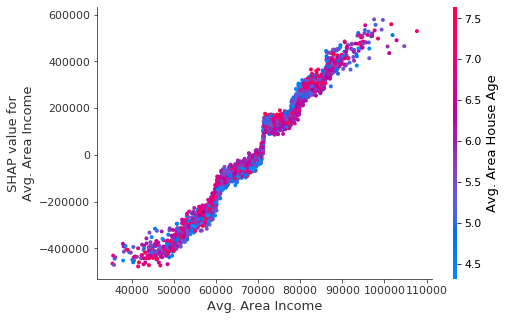

In [76]:
shap.dependence_plot(0, shap_values, X_train)

In [83]:
## SHAP Dependence Plot — Global Interpretability

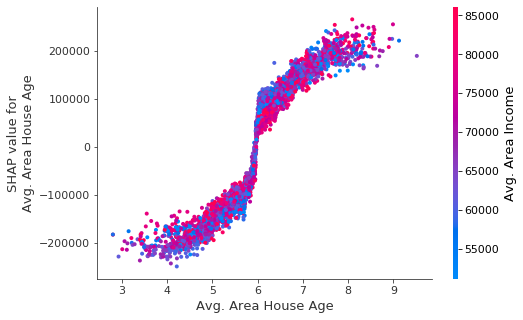

In [77]:
shap.dependence_plot(1, shap_values, X_train)

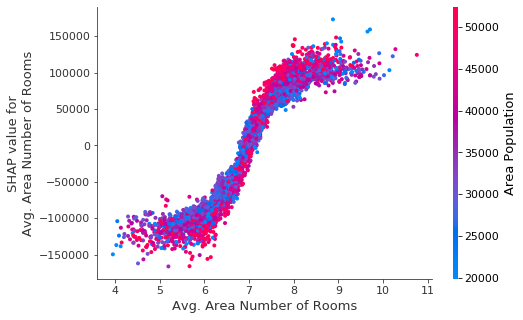

In [79]:
shap.dependence_plot(2, shap_values, X_train)

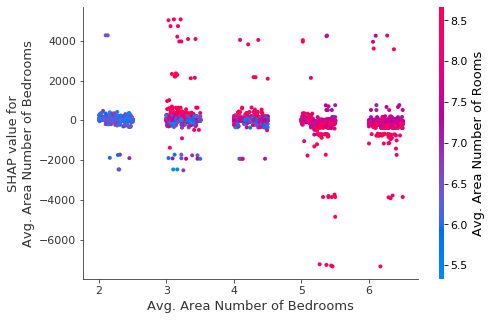

In [80]:
shap.dependence_plot(3, shap_values, X_train)

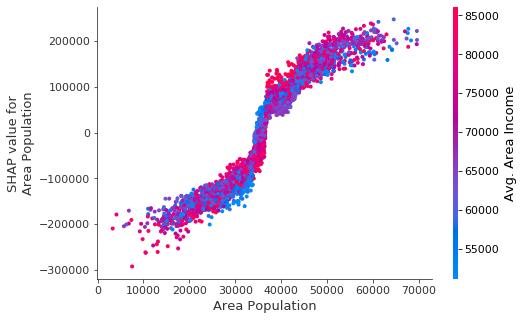

In [81]:
shap.dependence_plot(4, shap_values, X_train)